In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

In [3]:
def pre_process_simulation(df, columns, signals, new_columns):
    df = df[columns]
    for i, column in enumerate(new_columns):
        df[column] = df[signals[i]]
    for signal in new_columns:
        df[f'mag_{signal}'] = df[signal].apply(lambda x: float(x[1:-1].split(',')[0][:-2]))
        df[f'phase_{signal}'] = df[signal].apply(lambda x: float(x[1:-1].split(',')[1][:-1]))
    df = df.drop(new_columns, axis=1)
    df = df.drop(signals, axis=1)
    df['phase_complete_filter'][:107] = -df['phase_complete_filter'][:107]
    df['phase_complete_filter'][-99:] = -df['phase_complete_filter'][-99:]
    return df

In [4]:
df = pd.read_csv('../../data/electronics/passive_bandpass.txt', sep='\t', encoding='ISO-8859-1')
df.head()

,Freq.,V(n002)
0,1.000000,"(-6.79879847744457e+01dB,1.78919873827804e+02°)"
1,1.002305,"(-6.79479903129748e+01dB,1.78917384274230e+02°)"
2,1.004616,"(-6.79079958770616e+01dB,1.78914888984374e+02°)"
3,1.006932,"(-6.78680014668243e+01dB,1.78912387945034e+02°)"
4,1.009253,"(-6.78280070823811e+01dB,1.78909881142974e+02°)"


In [5]:
df['mag'] = df['V(n002)'].apply(lambda x: float(x.split(',')[0][1:-2]))
df['phase'] = df['V(n002)'].apply(lambda x: float(x.split(',')[1][:-2]))
df.head()

,Freq.,V(n002),mag,phase
0,1.000000,"(-6.79879847744457e+01dB,1.78919873827804e+02°)",-67.987985,178.919874
1,1.002305,"(-6.79479903129748e+01dB,1.78917384274230e+02°)",-67.947990,178.917384
2,1.004616,"(-6.79079958770616e+01dB,1.78914888984374e+02°)",-67.907996,178.914889
3,1.006932,"(-6.78680014668243e+01dB,1.78912387945034e+02°)",-67.868001,178.912388
4,1.009253,"(-6.78280070823811e+01dB,1.78909881142974e+02°)",-67.828007,178.909881


In [26]:
df_active = pd.read_csv('../../data/electronics/correct_filter_article.txt', sep='\t', encoding='ISO-8859-1')
df_active['mag'] = df_active['V(n004)'].apply(lambda x: float(x.split(',')[0][1:-2]))
df_active['phase'] = df_active['V(n004)'].apply(lambda x: float(x.split(',')[1][:-2]))
df_active['phase'][:5145] = 360+df_active['phase'][:5145]
df_active['phase'][-1012:] = -360+df_active['phase'][-1012:]
df_active.head()

/var/folders/fy/4wjvjmc95f1fv0gy4d27l6_h0000gn/T/ipykernel_54789/2095006222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['phase'][:5145] = 360+df_active['phase'][:5145]
/var/folders/fy/4wjvjmc95f1fv0gy4d27l6_h0000gn/T/ipykernel_54789/2095006222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['phase'][-1012:] = -360+df_active['phase'][-1012:]


,Freq.,V(n004),mag,phase
0,0.100000,"(-3.92402060734628e+02dB,-3.70026416560814e-02°)",-392.402061,359.962997
1,0.100231,"(-3.92322060738810e+02dB,-3.70879415486449e-02°)",-392.322061,359.962912
2,0.100462,"(-3.92242060743011e+02dB,-3.71734380777276e-02°)",-392.242061,359.962827
3,0.100693,"(-3.92162060747231e+02dB,-3.72591316966229e-02°)",-392.162061,359.962741
4,0.100925,"(-3.92082060751471e+02dB,-3.73450228596696e-02°)",-392.082061,359.962655


In [27]:
len(df_active)

7001

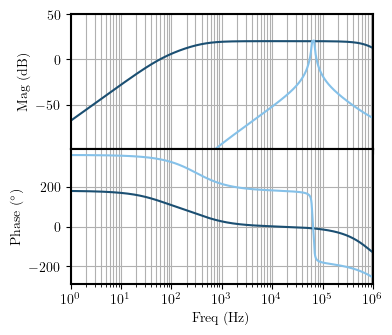

In [29]:
colors = ['#1B4F72', '#2E86C1', '#85C1E9']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(3*1.3, 3.5, forward=True)

ax1.figure.set_figwidth=5.4*1.3*10
ax1.figure.set_figheight=10*4.2

ax2.figure.set_figwidth=5.4*1.3*10
ax2.figure.set_figheight=10*4.2


ax1.plot(df['Freq.'].values, df['mag'].values, color=colors[0])
ax1.plot(df_active['Freq.'].values, df_active['mag'].values, color=colors[2])
ax1.set_xscale('log')
ax1.set_xlim([1e0, 1e6])
ax1.set_ylim([-99, 50])

ax1.grid(True, which="both", ls="-")

ax2.set_xlabel('Freq (Hz)')

ax1.set_ylabel('Mag (dB)')

ax2.set_ylabel(r'Phase (${}^\circ$)')

ax2.plot(df['Freq.'].values, df['phase'].values, color=colors[0])
ax2.plot(df_active['Freq.'].values, df_active['phase'].values, color=colors[2])
ax2.set_xscale('log')
ax2.set_xlim([1e0, 1e6])
ax2.grid(True, which="both", ls="-")
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('../../plots/bode_filters.png',dpi=300, bbox_inches = 'tight')